In [1]:
import numpy as np
import pandas as pd
from clean import *
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import re

from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn
%matplotlib inline
%matplotlib inline

In [4]:
df = pd.read_csv("/home/mcorral/Eliot/amultivariado/Rendimiento_Escolar.csv")
col = df.columns

### Empieza el analisis de las variables

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 37 columns):
Timestamp                                                                                           256 non-null object
Edad                                                                                                256 non-null int64
Género                                                                                              256 non-null object
Generación                                                                                          256 non-null int64
Estado Civil                                                                                        256 non-null object
¿Tienes hijos?                                                                                      256 non-null object
¿Cuántos hermanos tienes?                                                                           256 non-null int64
¿Con quien vives?                                         

In [6]:
var_con = ['Edad',
           '¿Cuántos hermanos tienes?',
           '¿Cuánto tiempo llevas viviendo ahí?(años)',
           '¿Cuántos cuartos para dormir tiene tu vivienda?',
           '¿Aproximadamente cuál es el ingreso promedio de tu hogar? (considerando a todos los que aportan)',
           'Promedio Actual',
           '¿Cuántas materias llevas este semestre?',
           '¿Cuántas horas estas en la escuela?',
           '¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)',
           '¿Cuántos exámenes extraordinarios has presentado?',
           '¿Cuántos idiomas hablas?(Por lo menos un nivel básico)',
           '¿En cuántos lenguajes de programación tienes conocimientos?',
           '¿En cuántos años terminaste el bachillerato?',
           '¿Cuánto tiempo tardas en llegar a la escuela? (min)',
           '¿Qué promedio obtuviste en el bachillerato?',
          '¿Cuántas horas libres tienes en tu horario escolar?',
          '¿Cuántas horas diarias duermes aproximadamente?',
          '¿Cuánto gastas en transporte?(al día)',
          'estudiar?',
          'deporte?',
          'leer?',
          'actividades culturales?',
          'fiestas, reuniones con amigos, familia, etc.?',
          'videojuegos, redes sociales, netflix, youtube, etc?']

### Creacion de vector discreto 

In [7]:
var_dis = [x for x in df.columns if x not in var_con]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcf1099978>,
      dtype=object)

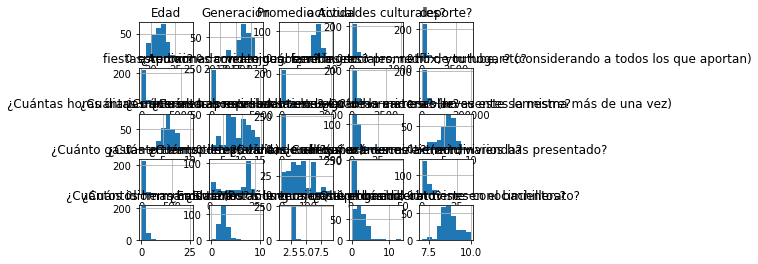

In [8]:
df.hist()

### Analsis factorial y componentes principales 

In [9]:
df_c = df[var_con].reset_index()

In [10]:
sc = StandardScaler()
mm = MinMaxScaler()

In [11]:
sc.fit(df_c)
mm.fit(df_c)

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
sc = StandardScaler()
sc.fit(df_c)
Xs = pd.DataFrame(sc.transform(df_c),columns=df_c.columns)
Xmm = pd.DataFrame(mm.transform(df_c),columns=df_c.columns)

/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mcorral/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
Xs.describe()

index          Edad  ¿Cuántos hermanos tienes?  \
count  256.000000  2.560000e+02               2.560000e+02   
mean     0.000000 -5.551115e-17              -1.734723e-17   
std      1.001959  1.001959e+00               1.001959e+00   
min     -1.725298 -2.087934e+00              -9.436656e-01   
25%     -0.862649 -8.332132e-01              -3.870334e-01   
50%      0.000000 -2.058527e-01              -3.870334e-01   
75%      0.862649  4.215079e-01               1.695989e-01   
max      1.725298  4.185671e+00               1.297214e+01   

       ¿Cuánto tiempo llevas viviendo ahí?(años)  \
count                               2.560000e+02   
mean                               -2.515349e-17   
std                                 1.001959e+00   
min                                -1.834968e+00   
25%                                -8.448736e-01   
50%                                 5.923597e-01   
75%                                 7.201138e-01   
max                                 1.614392e+00   

       ¿Cuántos cuartos para dormir tiene tu vivienda?  \
count                                     2.560000e+02   
mean                                     -2.081668e-17   
std                                       1.001959e+00   
min                                      -7.443640e-01   
25%                                      -4.257065e-01   
50%                                      -1.070490e-01   
75%                                       2.116085e-01   
max                                       1.423254e+01   

       ¿Aproximadamente cuál es el ingreso promedio de tu hogar? (considerando a todos los que aportan)  \
count                                         256.000000                                                  
mean                                            0.000000                                                  
std                                             1.001959                                                  
min                                            -0.735277                                                  
25%                                            -0.499909                                                  
50%                                            -0.311614                                                  
75%                                             0.159122                                                  
max                                             8.632381                                                  

       Promedio Actual  ¿Cuántas materias llevas este semestre?  \
count     2.560000e+02                             2.560000e+02   
mean     -9.020562e-17                             4.163336e-17   
std       1.001959e+00                             1.001959e+00   
min      -8.443508e+00                            -2.923718e+00   
25%      -5.516876e-01                            -4.329632e-01   
50%      -7.817835e-02                             1.897254e-01   
75%       5.373837e-01                             8.124140e-01   
max       3.078550e+00                             2.680480e+00   

       ¿Cuántas horas estas en la escuela?  \
count                         2.560000e+02   
mean                         -1.110223e-16   
std                           1.001959e+00   
min                          -2.278985e+00   
25%                          -9.902994e-01   
50%                          -2.378531e-02   
75%                           9.427288e-01   
max                           1.877026e+00   

       ¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)  \
count                                       2.560000e+02                                                
mean                                        5.551115e-17                                                
std                                         1.001959e+00                                                
min                                        -1.182834e+00  

In [14]:
len(df_c.columns)

25

In [15]:
pca =PCA()
pca.fit(Xs)
Xp=pd.DataFrame(pca.transform(Xs),columns=df_c.columns)

In [16]:
Xp

index       Edad  ¿Cuántos hermanos tienes?  \
0    2.078599   0.108786                  -0.940885   
1    1.571427   0.440322                  -1.485520   
2   -1.088931  -0.949484                  -0.768168   
3    2.066291   0.109434                  -0.939221   
4   -0.060219   0.529581                  -0.571987   
5   -0.319968  -1.039667                  -0.381474   
6    1.864074  -0.415606                   2.577321   
7    1.395077  -0.449081                   0.799280   
8   -0.598109  10.894737                   0.855188   
9    3.716934   0.482317                   1.324324   
10  -0.760914  -2.011710                   1.259720   
11   0.427912  -0.450605                   0.451735   
12   1.163870  -0.309936                  -0.708330   
13   0.236849   0.288053                  -0.478841   
14   4.484853   1.886685                  -3.502544   
15   1.276805   0.054166                   0.716068   
16   2.629712  -0.965943                  -1.630842   
17  -0.669467  -0.581452                   0.208142   
18  -0.315172  -1.263533                   0.492501   
19   0.252690   1.554360                  -1.662453   
20   1.188931  -1.104710                  -1.209677   
21   1.943974  -1.343067                  -1.132032   
22   0.854465  -0.493188                   1.390870   
23   1.992813  -0.405883                  -0.891854   
24   0.710816   0.668146                  -1.174751   
25   1.127778  -1.824738                   1.702041   
26   0.459687   0.668198                   0.917009   
27   0.328733  -1.063544                   1.447487   
28   0.032264  -0.677673                  -1.119981   
29  -1.018617  -0.787104                   0.659266   
..        ...        ...                        ...   
226 -2.392647  -0.422212                  -0.141689   
227 -1.362569  -1.140980                   0.453546   
228 -1.163270   1.603621                   1.407794   
229 -1.597840  -0.706932                   0.135002   
230 -0.547208   1.179510                  -0.788225   
231 -1.322256  -0.204413                   0.045981   
232  0.266943  -0.726479                   2.465621   
233  0.110855  -0.811654                  -2.568102   
234 -1.519817   0.787111                   0.470639   
235 -1.573486  -1.472107                   0.420969   
236 -1.800170  -0.036236                  -1.001787   
237 -1.637032   0.228963                  -0.015547   
238  0.587264  -0.199654                  -0.037657   
239 -0.407599  -0.811002                   0.985012   
240 -0.807975  -1.418406                   0.725797   
241 -1.919596   0.052576                  -0.681328   
242 -1.887129  -0.096904                  -0.354198   
243  0.806359   0.506158                  -1.056064   
244 -2.148355  -0.930167                   1.581970   
245 -1.521156  -0.848837                   0.054478   
246 -1.632712   1.447599                   0.573328   
247 -2.027208  -0.662255                  -0.786173   
248 -1.498685   0.493882                   0.817026   
249 -2.276713   0.769940                   1.019559   
250 -1.881381   3.043292                   0.689837   
251 -0.350497   0.443094                   0.041787   
252 -1.649309  -0.100967                   0.625525   
253  0.735983   0.400602                  -2.381205   
254 -0.623695  -0.128689                  -0.922866   
255 -1.721279   0.018007                  -1.071467   

     ¿Cuánto tiempo llevas viviendo ahí?(años)  \
0                                     0.097927   
1                                     0.599192   
2                                    -0.849618   
3                                     0.092327   
4                                    -0.415791   
5                                     0.071753   
6                                    -0.250421   
7                                    -0.046491   
8                                    -1.085862   
9                                     1.769357   
10                                    0.402589 

### Vamos a corroborar que todo este bien hasta ahora 

In [17]:
Xp.corr()

index  \
index                                               1.000000e+00   
Edad                                                1.522917e-17   
¿Cuántos hermanos tienes?                          -9.359849e-17   
¿Cuánto tiempo llevas viviendo ahí?(años)           2.338288e-16   
¿Cuántos cuartos para dormir tiene tu vivienda?     2.946765e-16   
¿Aproximadamente cuál es el ingreso promedio de...  1.880468e-16   
Promedio Actual                                     3.426750e-16   
¿Cuántas materias llevas este semestre?            -8.509625e-17   
¿Cuántas horas estas en la escuela?                 3.448889e-16   
¿Cuántas materias has reprobado a lo largo de l...  1.485234e-16   
¿Cuántos exámenes extraordinarios has presentado?   1.774505e-16   
¿Cuántos idiomas hablas?(Por lo menos un nivel ...  9.038785e-17   
¿En cuántos lenguajes de programación tienes co...  8.476846e-17   
¿En cuántos años terminaste el bachillerato?       -7.129033e-17   
¿Cuánto tiempo tardas en llegar a la escuela? (...  1.291172e-16   
¿Qué promedio obtuviste en el bachillerato?         1.791840e-18   
¿Cuántas horas libres tienes en tu horario esco... -3.745652e-17   
¿Cuántas horas diarias duermes aproximadamente?     2.483917e-16   
¿Cuánto gastas en transporte?(al día)              -3.618157e-18   
estudiar?                                          -2.531220e-16   
deporte?                                           -1.132039e-17   
leer?                                              -1.804749e-17   
actividades culturales?                             2.045101e-16   
fiestas, reuniones con amigos, familia, etc.?      -4.392765e-16   
videojuegos, redes sociales, netflix, youtube, ...  4.125674e-16   

                                                            Edad  \
index                                               1.522917e-17   
Edad                                                1.000000e+00   
¿Cuántos hermanos tienes?                           3.024181e-16   
¿Cuánto tiempo llevas viviendo ahí?(años)          -8.538647e-16   
¿Cuántos cuartos para dormir tiene tu vivienda?     1.342723e-16   
¿Aproximadamente cuál es el ingreso promedio de...  4.086877e-16   
Promedio Actual                                     7.471574e-17   
¿Cuántas materias llevas este semestre?             5.810344e-17   
¿Cuántas horas estas en la escuela?                -3.235309e-18   
¿Cuántas materias has reprobado a lo largo de l...  2.289994e-16   
¿Cuántos exámenes extraordinarios has presentado?   1.616694e-16   
¿Cuántos idiomas hablas?(Por lo menos un nivel ... -3.586911e-16   
¿En cuántos lenguajes de programación tienes co...  3.329415e-17   
¿En cuántos años terminaste el bachillerato?       -2.361209e-16   
¿Cuánto tiempo tardas en llegar a la escuela? (...  1.443578e-16   
¿Qué promedio obtuviste en el bachillerato?        -5.815099e-16   
¿Cuántas horas libres tienes en tu horario esco... -3.995099e-16   
¿Cuántas horas diarias duermes aproximadamente?     1.221329e-16   
¿Cuánto gastas en transporte?(al día)              -3.234688e-16   
estudiar?                                           3.869404e-17   
deporte?                                            1.340579e-16   
leer?                                               1.026735e-16   
actividades culturales?                             3.967721e-16   
fiestas, reuniones con amigos, familia, etc.?       5.484367e-16   
videojuegos, redes sociales, netflix, youtube, ...  4.367493e-16   

                                                    ¿Cuántos hermanos tienes?  \
index                                                           -9.359849e-17   
Edad                                                             3.024181e-16   
¿Cuántos hermanos tienes?                                        1.000000e+00   
¿Cuánto tiempo llevas viviendo ahí?(años)                        1.672127e-16   
¿Cuántos cuartos para dormir tiene tu vivienda?                  7.826547e-17   
¿Aproximadamente cuál es el ingreso

In [18]:
pca.explained_variance_ratio_

array([0.12571888, 0.1020488 , 0.08939524, 0.06241267, 0.05418325,
       0.05099972, 0.04722952, 0.04379675, 0.04098506, 0.04008548,
       0.03834672, 0.03205085, 0.03124234, 0.02896691, 0.02782855,
       0.02683885, 0.02581162, 0.0225266 , 0.02212435, 0.01920608,
       0.01681047, 0.01606163, 0.01453756, 0.01245431, 0.0083378 ])

In [20]:
np.cumsum(pca.explained_variance_ratio_)

array([0.12571888, 0.22776769, 0.31716292, 0.37957559, 0.43375884,
       0.48475856, 0.53198808, 0.57578483, 0.61676988, 0.65685536,
       0.69520209, 0.72725294, 0.75849528, 0.78746218, 0.81529073,
       0.84212958, 0.86794121, 0.89046781, 0.91259215, 0.93179823,
       0.9486087 , 0.96467033, 0.97920789, 0.9916622 , 1.        ])

In [21]:
fa = FactorAnalyzer()

In [22]:
help(FactorAnalyzer)

Help on class FactorAnalyzer in module factor_analyzer.factor_analyzer:

class FactorAnalyzer(builtins.object)
 |  A FactorAnalyzer class, which -
 |      (1) Fits a factor analysis model using minres or maximum likelihood,
 |          and returns the loading matrix
 |      (2) Optionally performs a rotation, with method including:
 |  
 |          (a) varimax (orthogonal rotation)
 |          (b) promax (oblique rotation)
 |          (c) oblimin (oblique rotation)
 |          (d) oblimax (orthogonal rotation)
 |          (e) quartimin (oblique rotation)
 |          (f) quartimax (orthogonal rotation)
 |          (g) equamax (orthogonal rotation)
 |  
 |  Parameters
 |  ----------
 |  log_warnings : bool
 |      Whether to log warnings, such as failure to
 |      converge.
 |      Defaults to False.
 |  
 |  Attributes
 |  ----------
 |  loadings : pd.DataFrame
 |      The factor loadings matrix.
 |      Default to None, if `analyze()` has not
 |      been called.
 |  corr : pd.DataFra

In [23]:
fa.analyze(Xs,2,rotation='varimax')

In [24]:
fa.loadings_

AttributeError: 'FactorAnalyzer' object has no attribute 'loadings_'

#### Inspección Visual 

In [25]:
pca = PCA(n_components=2)
mds = MDS(n_components=2)
pca.fit(Xs)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
Xp = pd.DataFrame(pca.transform(Xs),columns=['p1','p2'])
Xmm = pd.DataFrame(mds.fit_transform(Xmm),columns=['d1','d2'])

In [27]:
pca.explained_variance_ratio_.cumsum()

array([0.12571888, 0.22776769])

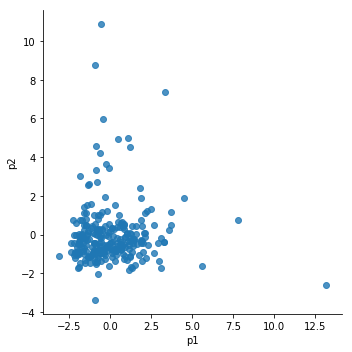

In [28]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False)

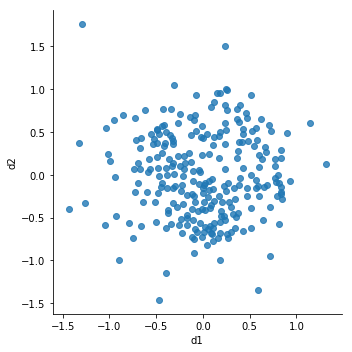

In [29]:
sns.lmplot(data=Xmm,x='d1',y='d2',fit_reg=False)

In [30]:
l = []
for k in range(2,10):
    km =KMeans(n_clusters=k)
    km.fit(Xs)
    l.append(km.inertia_)

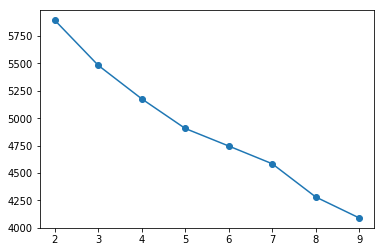

In [31]:
plt.plot(range(2,10),l,marker='o')

In [32]:
gmm = GaussianMixture(n_components=4)
gmm.fit(Xs)
Xp['cl'] = Xmm['cl'] = df['cl'] = Xs['cl'] = gmm.predict(Xs)

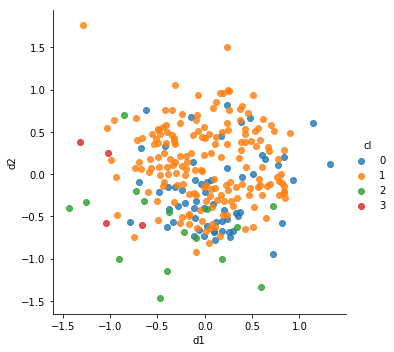

In [33]:
sns.lmplot(data=Xmm,x='d1',y='d2',fit_reg=False,hue='cl')

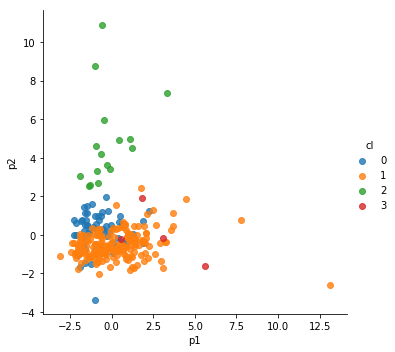

In [34]:
sns.lmplot(data=Xp,x='p1',y='p2',fit_reg=False,hue='cl')

### Perfil 

In [35]:
Xs.groupby('cl').mean()

index      Edad  ¿Cuántos hermanos tienes?  \
cl                                                  
0   0.352502 -0.320869                  -0.025222   
1  -0.148849  0.086440                  -0.105555   
2   0.243572 -0.441113                   0.134809   
3   0.287550  2.774110                   4.483499   

    ¿Cuánto tiempo llevas viviendo ahí?(años)  \
cl                                              
0                                    0.096248   
1                                   -0.104481   
2                                    0.456621   
3                                    1.326946   

    ¿Cuántos cuartos para dormir tiene tu vivienda?  \
cl                                                    
0                                          0.323139   
1                                         -0.112481   
2                                         -0.087133   
3                                          0.450602   

    ¿Aproximadamente cuál es el ingreso promedio de tu hogar? (considerando a todos los que aportan)  \
cl                                                                                                     
0                                           -0.060241                                                  
1                                            0.018770                                                  
2                                            0.059091                                                  
3                                           -0.158625                                                  

    Promedio Actual  ¿Cuántas materias llevas este semestre?  \
cl                                                             
0          0.276691                                 0.324641   
1         -0.080600                                -0.118081   
2         -0.176826                                 0.150807   
3          0.103334                                -0.277291   

    ¿Cuántas horas estas en la escuela?  \
cl                                        
0                              0.340805   
1                             -0.148261   
2                              0.519879   
3                             -0.668128   

    ¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)  \
cl                                                                                                   
0                                           -0.424042                                                
1                                            0.137507                                                
2                                           -0.100962                                                
3                                            0.714146                                                

                           ...                           \
cl                         ...                            
0                          ...                            
1                          ...                            
2                          ...                            
3                          ...                            

    ¿Qué promedio obtuviste en el bachillerato?  \
cl                                                
0                                      0.177241   
1                                     -0.031244   
2                                     -0.532421   
3                                      0.845815   

    ¿Cuántas horas libres tienes en tu horario escolar?  \
cl                                                        
0                                            0.233312     
1                                           -0.072608     
2                                           -0.052752     
3                                           -0.093924     

    ¿Cuántas horas diarias duermes aproximadamente?  \
cl                                                    
0                                         -0.092829  

In [36]:
aux=df[['cl','Género','Edad']].copy()

aux=aux.pivot_table(index='cl',columns='Género',values='Edad',aggfunc='count',fill_value=0)

aux ['t'] = aux.sum(axis=1)
for c in aux.columns:
        aux[c]/=aux['t']
aux.drop('t',axis=1,inplace=True)
aux

KeyError: "['Género'] not in index"

## Regresion Logistica 

In [49]:
df['Género '].value_counts(normalize=True)

Hombre    0.503906
Mujer     0.496094
Name: Género , dtype: float64

In [54]:
df['¿En cuántos lenguajes de programación tienes conocimientos?'].value_counts(normalize=True)

2     0.312500
3     0.238281
1     0.210938
4     0.089844
0     0.074219
5     0.042969
6     0.011719
7     0.007812
13    0.003906
9     0.003906
8     0.003906
Name: ¿En cuántos lenguajes de programación tienes conocimientos?, dtype: float64

In [57]:
df['Generación'].value_counts(normalize=True)

2016    0.320312
2017    0.234375
2018    0.191406
2015    0.171875
2014    0.074219
2019    0.003906
2011    0.003906
Name: Generación, dtype: float64

In [58]:
df.groupby('Género ').mean()

Edad   Generación  ¿Cuántos hermanos tienes?  \
Género                                                       
Hombre   21.449612  2016.302326                   1.519380   
Mujer    21.204724  2016.275591                   1.874016   

         ¿Cuánto tiempo llevas viviendo ahí?(años)  \
Género                                               
Hombre                                   15.162791   
Mujer                                    15.566929   

         ¿Cuántos cuartos para dormir tiene tu vivienda?  \
Género                                                     
Hombre                                          3.348837   
Mujer                                           3.322835   

         ¿Aproximadamente cuál es el ingreso promedio de tu hogar? (considerando a todos los que aportan)  \
Género                                                                                                      
Hombre                                        19740.674419                                                  
Mujer                                         13449.606299                                                  

         Promedio Actual  ¿Cuántas materias llevas este semestre?  \
Género                                                              
Hombre          7.825736                                 5.751938   
Mujer           7.873701                                 5.637795   

         ¿Cuántas horas estas en la escuela?  \
Género                                         
Hombre                              8.960465   
Mujer                               9.188976   

         ¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)  \
Género                                                                                                    
Hombre                                            5.279070                                                
Mujer                                             4.692913                                                

                                ...                           \
Género                          ...                            
Hombre                          ...                            
Mujer                           ...                            

         ¿Cuántas horas libres tienes en tu horario escolar?  \
Género                                                         
Hombre                                           11.527132     
Mujer                                             4.106299     

         ¿Cuántas horas diarias duermes aproximadamente?  \
Género                                                     
Hombre                                          6.124031   
Mujer                                           6.198425   

         ¿Cuánto tiempo tardas en llegar a la escuela? (min)  \
Género                                                         
Hombre                                           68.798450     
Mujer                                            70.834646     

         ¿Cuánto gastas en transporte?(al día)   estudiar?    deporte?  \
Género                                                                   
Hombre                               55.255814  293.317829  136.348837   
Mujer                                50.606299  395.346457   81.480315   

             leer?  actividades culturales?  \
Género                                        
Hombre   90.248062                39.550388   
Mujer    71.393701                36.732283   

         fiestas, reuniones con amigos, familia, etc.?  \
Género                                                   
Hombre                                      139.666667   
Mujer                                       246.779528   

         videojuegos, redes sociales, netflix, youtube, etc?  
Género                                                        
Hombre                                          224.503876    
Mujer                                           252

In [60]:
df.groupby('¿En cuántos lenguajes de programación tienes conocimientos?').mean()

Edad   Generación  \
¿En cuántos lenguajes de programación tienes co...                           
0                                                   20.842105  2016.578947   
1                                                   21.277778  2016.500000   
2                                                   20.862500  2016.637500   
3                                                   21.622951  2015.983607   
4                                                   21.826087  2015.869565   
5                                                   21.818182  2015.636364   
6                                                   22.000000  2015.000000   
7                                                   24.000000  2016.000000   
8                                                   25.000000  2016.000000   
9                                                   23.000000  2014.000000   
13                                                  23.000000  2014.000000   

                                                    ¿Cuántos hermanos tienes?  \
¿En cuántos lenguajes de programación tienes co...                              
0                                                                    1.631579   
1                                                                    1.685185   
2                                                                    1.500000   
3                                                                    1.639344   
4                                                                    1.782609   
5                                                                    1.272727   
6                                                                    1.000000   
7                                                                    2.000000   
8                                                                   25.000000   
9                                                                    2.000000   
13                                                                   3.000000   

                                                    ¿Cuánto tiempo llevas viviendo ahí?(años)  \
¿En cuántos lenguajes de programación tienes co...                                              
0                                                                                   12.315789   
1                                                                                   17.425926   
2                                                                                   15.762500   
3                                                                                   15.360656   
4                                                                                   13.608696   
5                                                                                    9.818182   
6                                                                                   16.000000   
7                                                                                   21.000000   
8                                                                                   25.000000   
9                                                                                    1.000000   
13                                                                                  23.000000   

                                                    ¿Cuántos cuartos para dormir tiene tu vivienda?  \
¿En cuántos lenguajes de programación tienes co...                                                    
0                                                                                          3.263158   
1                                                                                          3.037037   
2                                                                                          3.137500   
3                                                                                          3.901639   
4                                                                                          3.652174   
5    

In [62]:
df.groupby('Generación').mean()

Edad  ¿Cuántos hermanos tienes?  \
Generación                                         
2011        23.000000                   1.000000   
2014        23.263158                   2.000000   
2015        22.409091                   1.227273   
2016        21.926829                   2.073171   
2017        20.483333                   1.583333   
2018        19.612245                   1.530612   
2019        21.000000                   1.000000   

            ¿Cuánto tiempo llevas viviendo ahí?(años)  \
Generación                                              
2011                                        16.000000   
2014                                        14.157895   
2015                                        14.090909   
2016                                        16.853659   
2017                                        16.866667   
2018                                        12.816327   
2019                                         6.000000   

            ¿Cuántos cuartos para dormir tiene tu vivienda?  \
Generación                                                    
2011                                               4.000000   
2014                                               2.631579   
2015                                               2.772727   
2016                                               3.463415   
2017                                               3.783333   
2018                                               3.326531   
2019                                               4.000000   

            ¿Aproximadamente cuál es el ingreso promedio de tu hogar? (considerando a todos los que aportan)  \
Generación                                                                                                     
2011                                             20000.000000                                                  
2014                                             26552.631579                                                  
2015                                             18769.250000                                                  
2016                                             17364.634146                                                  
2017                                             12515.000000                                                  
2018                                             14581.632653                                                  
2019                                             15000.000000                                                  

            Promedio Actual  ¿Cuántas materias llevas este semestre?  \
Generación                                                             
2011               8.000000                                 3.000000   
2014               7.740526                                 3.684211   
2015               7.758636                                 4.522727   
2016               7.823171                                 6.487805   
2017               8.050500                                 6.433333   
2018               7.767347                                 5.326531   
2019               7.900000                                 7.000000   

            ¿Cuántas horas estas en la escuela?  \
Generación                                        
2011                                   4.000000   
2014                                   5.789474   
2015                                   6.931818   
2016                                   9.402439   
2017                                  11.150000   
2018                                   9.163265   
2019                                  14.900000   

            ¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)  \
Generación                                                                                                   
2011                                                 8.000000                                                
2014              

In [64]:
df.corr()

Edad  Generación  \
Edad                                                1.000000   -0.694730   
Generación                                         -0.694730    1.000000   
¿Cuántos hermanos tienes?                           0.171322   -0.021977   
¿Cuánto tiempo llevas viviendo ahí?(años)           0.145420   -0.036001   
¿Cuántos cuartos para dormir tiene tu vivienda?     0.010762    0.076924   
¿Aproximadamente cuál es el ingreso promedio de...  0.112175   -0.140262   
Promedio Actual                                    -0.039997    0.057771   
¿Cuántas materias llevas este semestre?            -0.188315    0.303134   
¿Cuántas horas estas en la escuela?                -0.318336    0.403708   
¿Cuántas materias has reprobado a lo largo de l...  0.338772   -0.398548   
¿Cuántos exámenes extraordinarios has presentado?   0.386657   -0.468988   
¿Cuántos idiomas hablas?(Por lo menos un nivel ...  0.161720   -0.228692   
¿En cuántos lenguajes de programación tienes co...  0.253712   -0.284544   
¿Qué promedio obtuviste en el bachillerato?        -0.057718    0.008673   
¿En cuántos años terminaste el bachillerato?        0.124384   -0.124511   
¿Cuántas horas libres tienes en tu horario esco... -0.024847    0.151060   
¿Cuántas horas diarias duermes aproximadamente?     0.042498   -0.097493   
¿Cuánto tiempo tardas en llegar a la escuela? (...  0.093502   -0.074379   
¿Cuánto gastas en transporte?(al día)               0.062238   -0.151947   
estudiar?                                           0.010927    0.027444   
deporte?                                           -0.111438    0.052631   
leer?                                               0.039923    0.018654   
actividades culturales?                             0.011024   -0.047091   
fiestas, reuniones con amigos, familia, etc.?      -0.062760    0.034134   
videojuegos, redes sociales, netflix, youtube, ... -0.072876    0.123683   

                                                    ¿Cuántos hermanos tienes?  \
Edad                                                                 0.171322   
Generación                                                          -0.021977   
¿Cuántos hermanos tienes?                                            1.000000   
¿Cuánto tiempo llevas viviendo ahí?(años)                            0.124539   
¿Cuántos cuartos para dormir tiene tu vivienda?                      0.040327   
¿Aproximadamente cuál es el ingreso promedio de...                   0.015414   
Promedio Actual                                                      0.071224   
¿Cuántas materias llevas este semestre?                             -0.047071   
¿Cuántas horas estas en la escuela?                                 -0.054739   
¿Cuántas materias has reprobado a lo largo de l...                   0.026339   
¿Cuántos exámenes extraordinarios has presentado?                    0.087649   
¿Cuántos idiomas hablas?(Por lo menos un nivel ...                   0.172806   
¿En cuántos lenguajes de programación tienes co...                   0.191693   
¿Qué promedio obtuviste en el bachillerato?                          0.126001   
¿En cuántos años terminaste el bachillerato?                         0.090940   
¿Cuántas horas libres tienes en tu horario esco...                  -0.028194   
¿Cuántas horas diarias duermes aproximadamente?                     -0.037141   
¿Cuánto tiempo tardas en llegar a la escuela? (...                  -0.004214   
¿Cuánto gastas en transporte?(al día)                                0.042840   
estudiar?                                                            0.025724   
deporte?                                                            -0.021815   
leer?                                                                0.070410   
actividades culturales?                                              0.027972   
fiestas, reuniones con amigos, familia, etc.?                       -0.035090   
videojuegos, redes sociales, netflix, youtube, ...    

In [69]:
df.columns

Index(['Timestamp', 'Edad', 'Género ', 'Generación', 'Estado Civil',
       '¿Tienes hijos?', '¿Cuántos hermanos tienes?', '¿Con quien vives?',
       '¿Cuánto tiempo llevas viviendo ahí?(años)',
       '¿Cuántos cuartos para dormir tiene tu vivienda?',
       '¿Cuál es máximo nivel de estudios de tu papá?',
       '¿Cuál es el máximo nivel de estudios de tu mamá?',
       '¿Cuentas con el apoyo de tus padres para realizar tus estudios?',
       '¿Aproximadamente cuál es el ingreso promedio de tu hogar? (considerando a todos los que aportan)',
       'Promedio Actual', '¿Cuántas materias llevas este semestre?',
       '¿Cuántas horas estas en la escuela?',
       '¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)',
       '¿Cuántos exámenes extraordinarios has presentado?',
       '¿Cuántos idiomas hablas?(Por lo menos un nivel básico)',
       '¿En cuántos lenguajes de programación tienes conocimientos?',
       '¿Qué promedio obtuviste en 

In [70]:
Vec = df[['¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)','¿En cuántos lenguajes de programación tienes conocimientos?','Generación','Promedio Actual']].copy()

In [71]:
Vec

¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)  \
0                                                    6                                                
1                                                    5                                                
2                                                    4                                                
3                                                    6                                                
4                                                    4                                                
5                                                    7                                                
6                                                    0                                                
7                                                    7                                                
8                                                    5                                                
9                                                   11                                                
10                                                   2                                                
11                                                   0                                                
12                                                   8                                                
13                                                   7                                                
14                                                  15                                                
15                                                   3                                                
16                                                   7                                                
17                                                   4                                                
18                                                   0                                                
19                                                  10                                                
20                                                  10                                                
21                                                   8                                                
22                                                   4                                                
23                                                   8                                                
24                                                   5                                                
25                                                   1                                                
26                                                   4                                                
27                                                   0                                                
28                                                   9                                                
29                                                   5                                                
..                                                 ...                                                
226                                                  2                                                
227                                                  3                                                
228                                                  0                                                
229                                                  2                                                
230                                                  6                                                
231                                                  6                                                
232                                                  3                                     

In [72]:
sc = MinMaxScaler()

In [73]:
sc.fit(Vec)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [75]:
Vecs = pd.DataFrame(sc.transform(Vec),columns=Vec.columns)

In [76]:
Vecs.describe()

¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)  \
count                                         256.000000                                                
mean                                            0.106134                                                
std                                             0.089904                                                
min                                             0.000000                                                
25%                                             0.063830                                                
50%                                             0.085106                                                
75%                                             0.127660                                                
max                                             1.000000                                                

       ¿En cuántos lenguajes de programación tienes conocimientos?  \
count                                         256.000000             
mean                                            0.182091             
std                                             0.122953             
min                                             0.000000             
25%                                             0.076923             
50%                                             0.153846             
75%                                             0.230769             
max                                             1.000000             

       Generación  Promedio Actual  
count  256.000000       256.000000  
mean     0.661133         0.732812  
std      0.154311         0.086960  
min      0.000000         0.000000  
25%      0.593750         0.684932  
50%      0.625000         0.726027  
75%      0.750000         0.779452  
max      1.000000         1.000000

In [77]:
lst_in = []
for i in range(2,8):
    cl = KMeans(n_clusters=i)
    cl.fit(Vecs)
    lst_in.append(cl.inertia_)

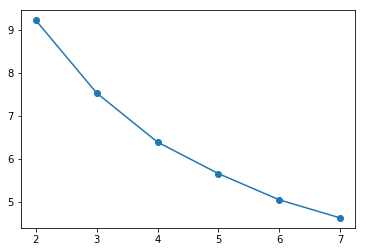

In [78]:
plt.plot(range(2,8),lst_in,marker='o')

In [79]:
cl = KMeans(n_clusters=4)

In [81]:
cl.fit(Vecs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [82]:
df['cl'] = cl.predict(Vecs)

In [83]:
df.groupby('cl').mean()

Edad   Generación  ¿Cuántos hermanos tienes?  \
cl                                                      
0   22.703704  2014.944444                   1.814815   
1   20.082569  2017.467890                   1.550459   
2   21.967033  2015.725275                   1.780220   
3   23.000000  2014.000000                   2.500000   

    ¿Cuánto tiempo llevas viviendo ahí?(años)  \
cl                                              
0                                   14.370370   
1                                   14.899083   
2                                   16.582418   
3                                   12.000000   

    ¿Cuántos cuartos para dormir tiene tu vivienda?  \
cl                                                    
0                                          2.814815   
1                                          3.568807   
2                                          3.362637   
3                                          3.500000   

    ¿Aproximadamente cuál es el ingreso promedio de tu hogar? (considerando a todos los que aportan)  \
cl                                                                                                     
0                                        23454.574074                                                  
1                                        13517.431193                                                  
2                                        14392.307692                                                  
3                                       102500.000000                                                  

    Promedio Actual  ¿Cuántas materias llevas este semestre?  \
cl                                                             
0          7.761481                                 4.814815   
1          7.919541                                 5.935780   
2          7.800330                                 6.010989   
3          8.650000                                 2.000000   

    ¿Cuántas horas estas en la escuela?  \
cl                                        
0                              7.277778   
1                             10.274312   
2                              8.857143   
3                              2.000000   

    ¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)  \
cl                                                                                                   
0                                            6.370370                                                
1                                            3.266055                                                
2                                            5.626374                                                
3                                           32.500000                                                

                           ...                           \
cl                         ...                            
0                          ...                            
1                          ...                            
2                          ...                            
3                          ...                            

    ¿Cuántas horas libres tienes en tu horario escolar?  \
cl                                                        
0                                            2.861111     
1                                           13.972477     
2                                            3.626374     
3                                            0.500000     

    ¿Cuántas horas diarias duermes aproximadamente?  \
cl                                                    
0                                          6.435185   
1                                          5.933028   
2                                          6.318681   
3                                          4.000000   

    ¿Cuánto tiempo tardas en llegar a la escuela? (min)  \
cl                                                        

In [84]:
pd.DataFrame(df.mean()).T

Edad   Generación  ¿Cuántos hermanos tienes?  \
0  21.328125  2016.289062                   1.695312   

   ¿Cuánto tiempo llevas viviendo ahí?(años)  \
0                                  15.363281   

   ¿Cuántos cuartos para dormir tiene tu vivienda?  \
0                                         3.335938   

   ¿Aproximadamente cuál es el ingreso promedio de tu hogar? (considerando a todos los que aportan)  \
0                                       16619.714844                                                  

   Promedio Actual  ¿Cuántas materias llevas este semestre?  \
0         7.849531                                 5.695312   

   ¿Cuántas horas estas en la escuela?  \
0                             9.073828   

   ¿Cuántas materias has reprobado a lo largo de la carrera? (no cuentes la misma más de una vez)  \
0                                           4.988281                                                

     ...     ¿Cuántas horas diarias duermes aproximadamente?  \
0    ...                                            6.160938   

   ¿Cuánto tiempo tardas en llegar a la escuela? (min)  \
0                                          69.808594     

   ¿Cuánto gastas en transporte?(al día)   estudiar?    deporte?      leer?  \
0                              52.949219  343.933594  109.128906  80.894531   

   actividades culturales?  fiestas, reuniones con amigos, familia, etc.?  \
0                38.152344                                     192.804688   

   videojuegos, redes sociales, netflix, youtube, etc?        cl  
0                                         238.621094    1.160156  

[1 rows x 26 columns]

In [93]:
df['¿Cuántos exámenes extraordinarios has presentado?'].value_counts(normalize=True)

0     0.199219
2     0.191406
1     0.164062
3     0.113281
4     0.082031
5     0.074219
6     0.042969
10    0.035156
8     0.023438
7     0.019531
9     0.015625
15    0.007812
25    0.003906
11    0.003906
12    0.003906
13    0.003906
14    0.003906
20    0.003906
21    0.003906
35    0.003906
Name: ¿Cuántos exámenes extraordinarios has presentado?, dtype: float64

In [94]:
aux = df[['¿Cuántos exámenes extraordinarios has presentado?','cl']].copy()

In [95]:
aux['n']=1

In [96]:
aux.pivot_table(aggfunc='count',index='cl',columns='¿Cuántos exámenes extraordinarios has presentado?')

n                    \
¿Cuántos exámenes extraordinarios has presentado?    0     1     2     3    
cl                                                                          
0                                                   2.0   4.0   9.0   6.0   
1                                                  37.0  28.0  21.0  10.0   
2                                                  12.0  10.0  19.0  13.0   
3                                                   NaN   NaN   NaN   NaN   

                                                                             \
¿Cuántos exámenes extraordinarios has presentado?   4     5    6    7    8    
cl                                                                            
0                                                  9.0   5.0  8.0  2.0  NaN   
1                                                  7.0   3.0  2.0  NaN  1.0   
2                                                  5.0  11.0  1.0  3.0  5.0   
3                                                  NaN   NaN  NaN  NaN  NaN   

                                                                            \
¿Cuántos exámenes extraordinarios has presentado?   9    10   11   12   13   
cl                                                                           
0                                                  1.0  5.0  NaN  NaN  NaN   
1                                                  NaN  NaN  NaN  NaN  NaN   
2                                                  3.0  4.0  NaN  NaN  1.0   
3                                                  NaN  NaN  1.0  1.0  NaN   

                                                                            \
¿Cuántos exámenes extraordinarios has presentado?   14   15   20   21   25   
cl                                                                           
0                                                  1.0  NaN  NaN  1.0  1.0   
1                                                  NaN  NaN  NaN  NaN  NaN   
2                                                  NaN  2.0  1.0  NaN  NaN   
3                                                  NaN  NaN  NaN  NaN  NaN   

                                                        
¿Cuántos exámenes extraordinarios has presentado?   35  
cl                                                      
0                                                  NaN  
1                                                  NaN  
2                                                  1.0  
3                                                  NaN

In [106]:
df['y'] = (df['¿Cuántos exámenes extraordinarios has presentado?']==0).astype(int)

In [107]:
df.y.value_counts(normalize=True)

0    0.800781
1    0.199219
Name: y, dtype: float64

In [102]:
len(df[df['¿Cuántos exámenes extraordinarios has presentado?']==0])

51

In [108]:
51/256

0.19921875

In [109]:
y = df['y'].copy()

In [110]:
lr = LogisticRegression()

In [121]:
Vect,Vecv,yt,yv =train_test_split(Vec,y,train_size=0.7)

lr.fit(Vect,yt)

print ("train %.3f"%accuracy_score(y_pred=lr.predict(Vect),y_true=yt))
print ("validate %.3f"%accuracy_score(y_pred=lr.predict(Vecv),y_true=yv))

train 0.849
validate 0.818


/home/rvelez/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [123]:
lr.predict(np.array([22,165,26,0]).reshape(1, -1))[0]

0

In [124]:
lr.coef_

array([[-4.65844181e-01, -3.97753014e-02,  2.97914861e-05,
         5.51830963e-02]])

In [125]:
lr.intercept_

array([-0.00021304])

In [126]:
import pickle

In [134]:
pickle.dump(lr,open('Rendimiento','wb'))

In [129]:
np.array([0])[0]

0

In [130]:
from sklearn.feature_selection import SelectKBest

In [131]:
sk = SelectKBest(k=1)

In [132]:
sk.fit(Vec,y)

SelectKBest(k=1, score_func=<function f_classif at 0x7fccc0dc7158>)

In [133]:
sk.get_support()

array([False, False,  True, False])